#### Collate CSV Files. Pickle.
Data loaded in the next code block using Pickle

In [8]:
import pandas as pd

path = 'C:/Users/AD/Documents/Essex/CE888/Final Project/StopSearch only/' #data.police.uk stop-and-search 2018-2020 all

years = ['2018','2019','2020']
months = [str(x) for x in range(1,13)]

periods = []

for y in years:
    for m in months:
        if int(m) < 10:
            temp = y + '-0' + m
            periods.append(temp)
        else:
            temp = y + '-' + m
            periods.append(temp)
            
counties = ['avon-and-somerset','bedfordshire','btp','cambridgeshire','cheshire','city-of-london','cleveland','cumbria',
         'derbyshire','devon-and-cornwall','dorset','durham','dyfed-powys','essex','gloucestershire','greater-manchester',
         'gwent','hampshire','hertfordshire','humberside','kent','lancashire','leicestershire','lincolnshire','merseyside',
         'metropolitan','norfolk','northamptonshire','northumbria','north-wales','north-yorkshire','nottinghamshire',
         'south-wales','south-yorkshire','staffordshire','suffolk','surrey','sussex','thames-valley','warwickshire',
         'west-mercia','west-midlands','west-yorkshire','wiltshire']
# print(path1 + periods[0] +'/' + periods[0] + '-' + counties[1] + '-stop-and-search.csv')

k = 0
missing = []
df_original = pd.DataFrame()
for p in periods:
    for c in counties:
        filename = path + p +'/' + p + '-' + c + '-stop-and-search.csv'
        try:
            temp = pd.read_csv(filename)
            df_original = df_original.append(temp, ignore_index = True).copy()
        except FileNotFoundError: #missing data for some periods/counties. Count how many and see which and when
            k = k + 1
            missing.append(p)
            missing.append(c)
            
import pickle

out_ = open('stopsearch','wb')
pickle.dump(df_original, out_)
out_.close()

#### Load stopandsearch1 from GitHub with pickle for running the data

In [1]:
import pickle
import pandas as pd

in_ = open('stopsearch', 'rb')
df_original = pickle.load(in_)
in_.close()

#### Make a Copy of the Original Data

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import aif360

df = df_original.copy()
print(df.shape)
print('\n Rows removed out of 1460396:', df_original.shape[0] - df.shape[0])

(1547490, 15)

 Rows removed out of 1460396: 0


#### Summary Statistics

In [4]:
df.head(5)

,Type,Date,Part of a policing operation,Policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing
6,Person search,2018-01-02T11:04:18+00:00,NaN,NaN,51.348244,-2.977460,Male,10-17,Asian/Asian British - Pakistani,Asian,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Nothing found - no further action,NaN,True
9,Person search,2018-01-02T16:18:39+00:00,NaN,NaN,51.348244,-2.977460,Male,over 34,Mixed/Multiple ethnic groups - White and Black...,Other,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Local resolution,True,True
10,Person search,2018-01-02T19:02:13+00:00,NaN,NaN,51.373173,-2.400887,Male,10-17,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,Nothing found - no further action,NaN,False
11,Person search,2018-01-02T19:02:13+00:00,NaN,NaN,51.373173,-2.400887,Male,10-17,Black/African/Caribbean/Black British - Caribbean,Black,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,Nothing found - no further action,NaN,False
12,Person search,2018-01-02T19:53:18+00:00,NaN,NaN,51.453281,-2.596796,Male,over 34,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,Local resolution,True,False


In [15]:
df['Self-defined ethnicity'].unique()

array(['Asian/Asian British - Pakistani',
       'Mixed/Multiple ethnic groups - White and Black Caribbean',
       'White - English/Welsh/Scottish/Northern Irish/British',
       'Black/African/Caribbean/Black British - Caribbean',
       'Other ethnic group - Not stated',
       'Black/African/Caribbean/Black British - African',
       'Other ethnic group - Any other ethnic group',
       'White - Any other White background',
       'Black/African/Caribbean/Black British - Any other Black/African/Caribbean background',
       'Asian/Asian British - Any other Asian background',
       'Mixed/Multiple ethnic groups - White and Black African',
       'Asian/Asian British - Bangladeshi',
       'Mixed/Multiple ethnic groups - Any other Mixed/Multiple ethnic background',
       'Asian/Asian British - Indian', 'White - Irish',
       'Mixed/Multiple ethnic groups - White and Asian',
       'Asian/Asian British - Chinese', 'Other ethnic group - Arab',
       'White - Gypsy or Irish Travelle

In [273]:
pd.DataFrame(df['Outcome'].value_counts())

,Outcome
A no further action disposal,1117660
Arrest,194667
Community resolution,89274
Khat or Cannabis warning,35220
Summons / charged by post,26730
Penalty Notice for Disorder,23449
Nothing found - no further action,13499
Caution (simple or conditional),6240
Suspect arrested,3598
Offender given drugs possession warning,1375


#### Start Exploring and Plotting

In [30]:
# conflate identity into b/ w/ a

df_1 = df_original.copy()

print(df_1.shape)
df_1.dropna(subset=['Self-defined ethnicity'], inplace= True)

print(df_1.shape)
df_1['W-B-A'] = np.where(df_1['Self-defined ethnicity'].str.contains('Mixed'), 'Other or Mixed',
                    np.where(df_1['Self-defined ethnicity'].str.contains('Black') , 'Black',
                      np.where(df_1['Self-defined ethnicity'].str.contains('White'), 'White',
                              np.where(df_1['Self-defined ethnicity'].str.contains('Asian'), 'Asian', 'Other or Mixed'))))
df_1['W-B-A'].unique()

(1547490, 15)
(1488169, 15)


array(['Other or Mixed', 'Asian', 'White', 'Black'], dtype=object)

#### Cluster by Location

In [3]:
from sklearn.cluster import KMeans

location = df.loc[:,['Latitude', 'Longitude']]

location.dropna(inplace = True)

location = np.array(location)

location[0:5]

array([[51.38329 , -2.361689],
       [50.881621, -2.953773],
       [51.348244, -2.97746 ],
       [51.431919, -2.578493],
       [51.434075, -2.580678]])

In [70]:
model = KMeans(n_clusters = 4, n_jobs = -1)

model.fit(location)

model.labels_


C:\Users\AD\anaconda3\envs\AIF360\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


array([3, 3, 3, ..., 3, 3, 3])

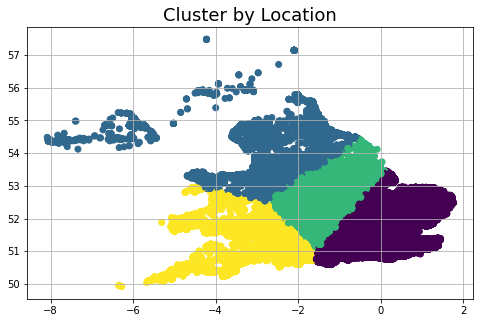

In [116]:
plt.figure(figsize=(8,5))
plt.title("Cluster by Location", fontsize=18)
plt.grid(True)
plt.scatter(location[:,1], location[:,0], c = model.labels_)

#### Apply elbow method for good measure. Two natural clusters present.

In [80]:
from scipy.spatial.distance import cdist

distortions = []
vals = {}

for k in range(1,15):
    Kmodel = KMeans(n_clusters=k)
    Kmodel.fit(location)
 
    distortions.append(sum(np.min(cdist(location, Kmodel.cluster_centers_,
                                        'euclidean'), axis=1)) / location.shape[0])
 
    vals[k] = sum(np.min(cdist(location, Kmodel.cluster_centers_,
                                   'euclidean'), axis=1)) / location.shape[0]

In [82]:

for key, val in vals.items():
    print(f'{key} : {val}')

1 : 1.2669432017690327
2 : 0.5420353624706633
3 : 0.46558067784928897
4 : 0.3978128152800638
5 : 0.33440567304611096
6 : 0.3049178093045052
7 : 0.27725149478100775
8 : 0.2605477040947161
9 : 0.2440868872761642
10 : 0.2274311858948783
11 : 0.22914382244701537
12 : 0.22017754250214447
13 : 0.20636464920236888
14 : 0.19983839048126875


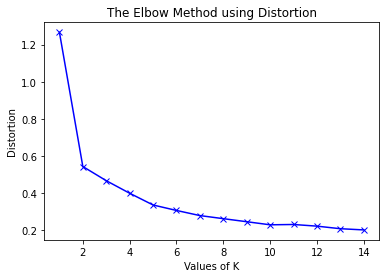

In [83]:

plt.plot(range(1,15), distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

#### Train with more clusters to discover the highest density regions by frequency of label

In [19]:
mm = KMeans(n_clusters = 57, n_jobs = -1)

mm.fit(location)

C:\Users\AD\anaconda3\envs\AIF360\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=57, n_jobs=-1)

In [20]:
print(pd.Series(mm.labels_).value_counts().quantile(0.75))
pd.Series(mm.labels_).value_counts()

16629.0


0     182998
25    119286
54    100457
31     79580
22     76490
1      66291
40     65847
12     53416
45     48033
9      34130
3      33062
41     22467
2      18299
5      18288
47     16629
6      16493
24     16343
8      15344
4      14628
26     14583
56     14219
43     14212
37     13001
52     12863
30     11776
35     11627
51     11520
44     11142
11     10719
38      9136
7       9006
39      8768
15      8617
33      8200
42      7396
18      7351
28      6982
46      5950
34      5925
14      5534
17      5231
32      4985
27      4730
55      4713
36      4178
10      4067
48      3979
49      3902
23      3812
16      3585
53      3457
13      3226
50      2181
21      1862
20      1475
29       656
19       212
dtype: int64

In [28]:
ccc = mm.labels_.copy()

for i in range(0,len(ccc)):
    if ccc[i] not in [0,25,54,31,22,1,40,12,45,9,3,41,2,5,47]:
        ccc[i] = 99

ccc

array([99, 99,  3, ..., 99, 99, 99])

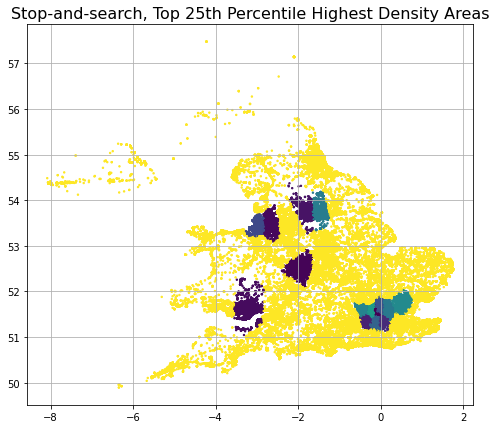

In [29]:
plt.figure(figsize=(8,7))
plt.title("Stop-and-search, Top 25th Percentile Highest Density Areas", fontsize=16)
plt.grid(True)
plt.scatter(location[:,1], location[:,0], c = ccc, s=2)

#### Another figure with more colored cluster regions

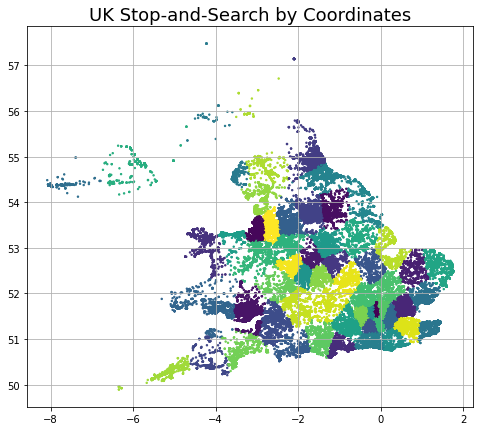

In [354]:
plt.figure(figsize=(8,7))
plt.title("UK Stop-and-Search by Coordinates", fontsize=18)
plt.grid(True)
plt.scatter(location[:,1], location[:,0], c = mm.labels_, s=2)
#plt.savefig('Crime_33Clusters.png', dpi=300)

Even though the actual location of the incidents is anonymised by approximating to the nearest public place, some densely packed regions can be observed. Although the plot uses an arbitrary number of clusters, the data will be classified using a larger number of clusters in order to partition it proportionately into training and test subsets for the following part of the project.

#### Compare search numbers between groups

In [7]:
incident = df_1['W-B-A'].value_counts().sort_values(ascending = False).rename('Search Count')
incident

White             755585
Other or Mixed    313044
Black             254568
Asian             164972
Name: Search Count, dtype: int64

The next table portrays incident count by broad ethnic group and uses the White population of the UK to answer the question: 'if there were as many people from the other groups as there are White, what would be the proportional stop-and-search incident count?'.

In [12]:
counts = pd.concat([incident, pd.Series(data = [1,0.033268,0.03453,0.079385], index = ['White','Other or Mixed','Black','Asian']).rename(
    'UK Demographic Relative Ratio')], axis = 1) 
counts['Projected Searches'] = round(counts.iloc[0,0] * counts['UK Demographic Relative Ratio'],0)
counts['Projected Factor Difference'] = counts['Search Count'] / (counts.iloc[0,0] * counts['UK Demographic Relative Ratio'])

counts


,Search Count,UK Demographic Relative Ratio,Projected Searches,Projected Factor Difference
White,755585,1.000000,755585.0,1.000000
Other or Mixed,313044,0.033268,25137.0,12.453613
Black,254568,0.034530,26090.0,9.757171
Asian,164972,0.079385,59982.0,2.750353


#### Look at 'Outcome linked to object of search' column and create table

In [62]:
df_2 = df_1.copy()

print(df_2.shape)

df_2.dropna(subset = ['Outcome linked to object of search'], inplace = True)

print(df_2.shape)


incident_adjusted = df_2.groupby('W-B-A')['Outcome linked to object of search'].count().sort_values(ascending = False).rename('Searches')

true_suspicion = df_2.groupby('W-B-A')['Outcome linked to object of search'].value_counts()

true_suspicion

(1488169, 16)
(432490, 16)


W-B-A           Outcome linked to object of search
Asian           True                                   16296
                False                                  12323
Black           False                                  16134
                True                                   13463
Other or Mixed  False                                  39580
                True                                   30108
White           False                                 171084
                True                                  133502
Name: Outcome linked to object of search, dtype: int64

In [63]:
linked = pd.concat([incident_adjusted, pd.Series([133502,30108,13463,16296], 
                                                 name = 'Outcome linked to object of search', 
                                                 index = ['White','Other or Mixed','Black','Asian'])], axis = 1)
linked['Proportion'] = linked['Outcome linked to object of search']/linked['Searches']

linked

,Searches,Outcome linked to object of search,Proportion
White,304586,133502,0.438306
Other or Mixed,69688,30108,0.432040
Black,29597,13463,0.454877
Asian,28619,16296,0.569412


#### Preprocess data for model training

In [272]:
df_s = df.copy()
df_s.dropna(subset =['Outcome', 'Latitude', 'Longitude', 'Officer-defined ethnicity'], inplace = True)

df_s = df_s.sample(frac = 1)

In [242]:
df_s.head(5)

,Type,Date,Part of a policing operation,Policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing
1463822,Person search,2020-11-07T17:13:00+00:00,False,NaN,51.495419,-0.097501,Male,over 34,White - Any other White background,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,NaN,NaN
1455007,Person search,2020-11-06T00:04:46+00:00,NaN,NaN,53.490615,-3.033360,Female,18-24,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),NaN,A no further action disposal,NaN,False
1257880,Person search,2020-07-10T22:38:00+00:00,False,NaN,51.561416,-0.299628,Male,10-17,Black/African/Caribbean/Black British - Any ot...,Black,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,A no further action disposal,NaN,NaN
484954,Person search,2019-04-08T11:36:22+00:00,False,NaN,52.704055,-2.753504,Male,over 34,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Arrest,True,NaN
634122,Person search,2019-08-03T23:08:03+00:00,NaN,NaN,53.422230,-2.946241,Male,over 34,White - English/Welsh/Scottish/Northern Irish/...,White,NaN,Offensive weapons,A no further action disposal,NaN,False


#### Encode labels

In [273]:
encoded = df_s.iloc[:, [0,2,6,7,8,9,10,11,14]]

encoded = pd.get_dummies(encoded,prefix_sep='_', drop_first=True)

encoded.head()

,Type_Person search,Type_Vehicle search,Part of a policing operation_True,Gender_Male,Gender_Other,Age range_18-24,Age range_25-34,Age range_over 34,Age range_under 10,Self-defined ethnicity_Asian/Asian British - Bangladeshi,...,Object of search_Evidence of wildlife offences,Object of search_Firearms,Object of search_Fireworks,Object of search_Game or poaching equipment,Object of search_Goods on which duty has not been paid etc.,Object of search_Offensive weapons,Object of search_Psychoactive substances,Object of search_Seals or hunting equipment,Object of search_Stolen goods,Removal of more than just outer clothing_True
1474522,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
579496,1,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1325254,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
360182,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1354558,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [274]:
labs = df_s.iloc[:,12]

from sklearn.preprocessing import LabelEncoder
labs = LabelEncoder().fit_transform(labs)


In [275]:
encoded.shape, labs.shape

((1143421, 65), (1143421,))

#### Train a set of classifiers with and without the race feature

In [161]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

In [278]:
X_train, X_test, y_train, y_test1 = train_test_split(encoded.iloc[0:,0:64], 
                                                    labs, 
                                                    test_size = 0.25, 
                                                    stratify = labs, 
                                                    random_state = 1)

forest_race = RandomForestClassifier(max_depth = 15, n_estimators = 600, n_jobs=-1) 
forest_race.fit(X_train, y_train)

lab_forest_race = forest_race.predict(X_test)

In [258]:
X_train, X_test, y_train, y_test2 = train_test_split(encoded.drop(encoded.iloc[0:,11:29], axis = 1), 
                                                    labs, 
                                                    test_size = 0.25, 
                                                    stratify = labs, 
                                                    random_state = 1)

forest_norace = RandomForestClassifier(max_depth = 15, n_estimators = 600, n_jobs=-1) 
forest_norace.fit(X_train, y_train)

lab_forest_norace = forest_norace.predict(X_test)

In [279]:
X_train, X_test, y_train, y_test3 = train_test_split(encoded.iloc[0:,0:64], 
                                                    labs, 
                                                    test_size = 0.25, 
                                                    stratify = labs, 
                                                    random_state = 1)

MLP_race = MLPClassifier(max_iter = 300)

MLP_race.fit(X_train, y_train)

lab_mlp_race = MLP_race.predict(X_test)

In [261]:
X_train, X_test, y_train, y_test4 = train_test_split(encoded.drop(encoded.iloc[0:,11:29], axis = 1), 
                                                    labs, 
                                                    test_size = 0.25, 
                                                    stratify = labs, 
                                                    random_state = 1)
MLP_norace = MLPClassifier(max_iter = 300)

MLP_norace.fit(X_train, y_train)

lab_mlp_norace = MLP_norace.predict(X_test)

In [164]:
X_train, X_test, y_train, y_test5 = train_test_split(encoded.iloc[0:,0:66], 
                                                    labs, 
                                                    test_size = 0.25, 
                                                    stratify = labs, 
                                                    random_state = 1)
dummy_race = DummyClassifier(strategy = 'stratified')

dummy_race.fit(X_train, y_train)

lab_dummy_race = dummy_race.predict(X_test)

In [165]:
X_train, X_test, y_train, y_test6 = train_test_split(encoded.drop(encoded.iloc[0:,11:29], axis = 1), 
                                                    labs, 
                                                    test_size = 0.25, 
                                                    stratify = labs, 
                                                    random_state = 1)
dummy_norace = DummyClassifier(strategy = 'stratified')

dummy_norace.fit(X_train, y_train)

lab_dummy_norace = dummy_norace.predict(X_test)

In [200]:
# accuracy multilabel

print(accuracy_score(y_test1, lab_forest_race))
print(accuracy_score(y_test2, lab_forest_norace))
print(accuracy_score(y_test3, lab_mlp_race))
print(accuracy_score(y_test4, lab_mlp_norace))
print(accuracy_score(y_test5, lab_dummy_race))
print(accuracy_score(y_test6, lab_dummy_norace))

0.7382857979229454
0.7384188571542623
0.738262512557465
0.7382857979229454
0.566795734121044
0.5674510508352794


In [262]:
# f1 multilabel

print(f1_score(y_test1, lab_forest_race, average = 'weighted'))
print(f1_score(y_test2, lab_forest_norace, average = 'weighted'))
print(f1_score(y_test3, lab_mlp_race, average = 'weighted'))
print(f1_score(y_test4, lab_mlp_norace, average = 'weighted'))
print(f1_score(y_test5, lab_dummy_race, average = 'weighted'))
print(f1_score(y_test6, lab_dummy_norace, average = 'weighted'))

0.6268836767121783
0.6278721425100597
0.626861778078311
0.6277481492539289
0.543020460142144
0.5426467540904402


In [213]:
results = pd.DataFrame({'Random Forrest':[0.7382857979229454, 0.7384188571542623, 0.8681814601454418],
                       'MLP':[0.738262512557465,0.7382857979229454,0.9768297252112965],
                        'Dummy Classifier':[0.566795734121044, 0.5674510508352794, 'NA']
                       }, 
                      index = ['Race Label', 'No Race Label', 'p-value'])

results

,Random Forrest,MLP,Dummy Classifier
Race Label,0.738286,0.738263,0.566796
No Race Label,0.738419,0.738286,0.567451
p-value,0.868181,0.976830,NA


In [271]:
results1 = pd.DataFrame({'Random Forrest':[0.6268836767121783, 0.6278721425100597],
                       'MLP':[0.626861778078311,0.6277481492539289],
                        'Dummy Classifier':[0.543020460142144, 0.5426467540904402]
                       }, 
                      index = ['Race Label', 'No Race Label'])

results1

,Random Forrest,MLP,Dummy Classifier
Race Label,0.626884,0.626862,0.543020
No Race Label,0.627872,0.627748,0.542647


#### Calculate p-value using N(0,1) distribution

In [285]:
import math as mm

Z = (0.7382857979229454 - 0.7384188571542623)/(0.44551824376427433242719289232805/mm.sqrt(300618))

print('Z-score',Z)

from scipy.stats import norm

up = norm(loc = 0, scale = 1).cdf(-Z)
lw = norm(loc = 0, scale = 1).cdf(Z)

print(lw,up)
prob = up-lw
print('prob of value being between -Z and +Z = ', up-lw)

1-prob

Z-score -0.1637521488900692
0.4349631313601149 0.5650368686398851
prob of value being between -Z and +Z =  0.13007373727977023


0.8699262627202298

#### Optimise for best parameters

In [ ]:
r = []
for depth in [5,10,15,20,25]:
    for estimators in [300,900,1200,1800]:
        model = RandomForestClassifier(max_depth = depth, n_estimators = estimators, n_jobs = -1)
        model.fit(X_train, y_train)
        acc = accuracy_score(y_true = y_test, y_pred = model.predict(X_test))
        r.append([acc,depth,estimators])

print(r)

[[0.7382138431728027, 5, 300], [0.7382138431728027, 5, 900], [0.7382138431728027, 5, 1200], [0.7382138431728027, 5, 1800], [0.7382138431728027, 10, 300], [0.7382138431728027, 10, 900], [0.7382138431728027, 10, 1200], [0.7382138431728027, 10, 1800], [0.7383261120859564, 15, 300], [0.7383552188412185, 15, 900], [0.7383427445175348, 15, 1200]]

#### Convert to outcome to binary 'lawbreaking' vs 'false alarm'

In [88]:
df['Outcome'].value_counts()

A no further action disposal                                    1117660
Arrest                                                           194667
Community resolution                                              89274
Khat or Cannabis warning                                          35220
Summons / charged by post                                         26730
Penalty Notice for Disorder                                       23449
Nothing found - no further action                                 13499
Caution (simple or conditional)                                    6240
Suspect arrested                                                   3598
Offender given drugs possession warning                            1375
Local resolution                                                   1035
Article found - Detailed outcome unavailable                        613
Suspect summonsed to court                                          446
Offender given penalty notice                                   

In [97]:
df_b = df_1.copy()

print(df_b.shape)

df_b.dropna(subset = ['Outcome'], inplace = True)

print(df_b.shape)

df_b['Degree'] = np.where(df_b['Outcome'].isin(['A no further action disposal',
                                               'Nothing found - no further action']), 'Non-serious', 'Serious')

df_b.groupby('W-B-A')['Degree'].value_counts(), df_b['W-B-A'].value_counts()

(1488169, 16)
(1460396, 16)


(W-B-A           Degree     
 Asian           Non-serious    119190
                 Serious         42133
 Black           Non-serious    186701
                 Serious         66091
 Other or Mixed  Non-serious    244297
                 Serious         63783
 White           Non-serious    540669
                 Serious        197532
 Name: Degree, dtype: int64,
 White             738201
 Other or Mixed    308080
 Black             252792
 Asian             161323
 Name: W-B-A, dtype: int64)

In [263]:
degree = pd.DataFrame({'Ethnic Group': ['Asian','Asian','Black','Black','Other or Mixed','Other or Mixed','White','White'],
             'Search Outcome': ['False Alarm','Lawbreaking','False Alarm','Lawbreaking','False Alarm','Lawbreaking','False Alarm','Lawbreaking'],
             'n': [119190, 42133,186701,66091,244297,63783,540669,197532]})
degree

,Ethnic Group,Search Outcome,n
0,Asian,False Alarm,119190
1,Asian,Lawbreaking,42133
2,Black,False Alarm,186701
3,Black,Lawbreaking,66091
4,Other or Mixed,False Alarm,244297
5,Other or Mixed,Lawbreaking,63783
6,White,False Alarm,540669
7,White,Lawbreaking,197532


#### Create and plot disparate impact charts

In [296]:
totals = pd.DataFrame({'Ethnic Group': ['Asian','Black','Other or Mixed','White',],
             
             'Total Searches': [161323,252792,308080,738201],
             'Population Demographic': [4373339,1904684,1830603,55073552]})

totals['Proportion'] = totals['Total Searches']/totals['Population Demographic']

totals

,Ethnic Group,Total Searches,Population Demographic,Proportion
0,Asian,161323,4373339,0.036888
1,Black,252792,1904684,0.132721
2,Other or Mixed,308080,1830603,0.168294
3,White,738201,55073552,0.013404


In [98]:
# disparate impact searches_population

wh_2 = 738201/55073552
bl_2 = 252792/1904684
aan_2 = 161323/4373339

bl_2/wh_2, aan_2/wh_2

(9.901679174353394, 2.7520201211598994)

Text(0.5, 0.98, 'Disparate Impact Test, White Group Priviledged')

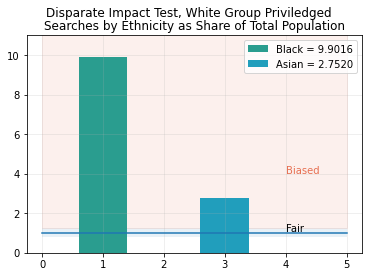

In [104]:
x = np.linspace(0, 5, 300)
y1 = x*0 + 1
plt.ylim(0,11)
 
plt.plot(x, y1, '-')
plt.fill_between(x, 1-0.2, 1+0.25, alpha = 0.1)
plt.fill_between(x,1.25,11, color = '#e76f51', alpha = 0.1)
plt.bar(1, 9.901679174353394, label= 'Black = 9.9016', color = '#2a9d8f')
plt.bar(3, 2.7520201211598994, label = 'Asian = 2.7520', color = '#219ebc')
plt.grid(True, alpha = 0.25)

plt.text(4,1.1,'Fair')
plt.text(4, 4, 'Biased', color = '#e76f51')

plt.legend()

plt.title('Searches by Ethnicity as Share of Total Population',fontsize = 12)
plt.suptitle('Disparate Impact Test, White Group Priviledged',fontsize = 12)

In [249]:
# disparate impact finds_data set

wh = 197532/738201
bl = 66091/252792
aan = 42133/161323

wh,bl, aan,'white-black', bl/wh, bl-wh, 'white-asian', aan/wh, aan-wh

(0.26758565756480956,
 0.2614441912718757,
 0.26117168661629153,
 'white-black',
 0.9770485968910856,
 -0.006141466292933884,
 'white-asian',
 0.9760302139999243,
 -0.006413970948518033)

Text(0.5, 0.98, 'Disparate Impact Test, White Group Priviledged')

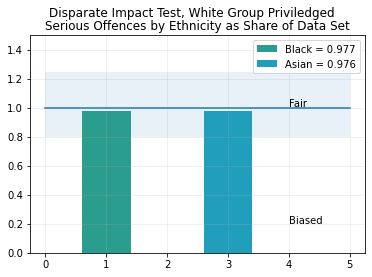

In [109]:
x = np.linspace(0, 5, 300)
y1 = x*0 + 1
plt.ylim(0,1.5)
 
plt.plot(x, y1, '-')
plt.fill_between(x, 1-0.2, 1+0.25, alpha = 0.1)
plt.bar(1, 0.9770485968910856, label= 'Black = 0.977', color = '#2a9d8f')
plt.bar(3, 0.9760302139999243, label = 'Asian = 0.976', color = '#219ebc')
plt.grid(True, alpha = 0.25)

plt.text(4,1.01,'Fair')
plt.text(4, 0.2, 'Biased')

plt.legend()

plt.title('Serious Offences by Ethnicity as Share of Data Set',fontsize = 12)
plt.suptitle('Disparate Impact Test, White Group Priviledged',fontsize = 12)

In [312]:
# disparate impact finds_population

wh = 197532/55073552
bl = 66091/1904684
aan = 42133/4373339

wh,bl, aan,'white-black', bl/wh, bl-wh, 'white-asian', aan/wh, aan-wh

(0.003586694390076747,
 0.034699194197042656,
 0.009634057638797267,
 'white-black',
 9.674421744167663,
 0.03111249980696591,
 'white-asian',
 2.6860547877877936,
 0.00604736324872052)

Text(0.5, 0.98, 'Disparate Impact Test, White Group Priviledged')

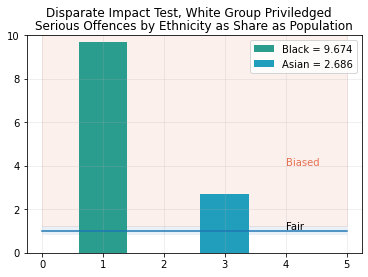

In [110]:
x = np.linspace(0, 5, 300)
y1 = x*0 + 1
plt.ylim(0,10)
 
plt.plot(x, y1, '-')
plt.fill_between(x, 1-0.2, 1+0.25, alpha = 0.1)
plt.fill_between(x,1.25,10, color = '#e76f51', alpha = 0.1)
plt.bar(1, 9.674421744167663, label= 'Black = 9.674', color = '#2a9d8f')
plt.bar(3, 2.6860547877877936, label = 'Asian = 2.686', color = '#219ebc')
plt.grid(True, alpha = 0.25)

plt.text(4,1.1,'Fair')
plt.text(4, 4, 'Biased', color = '#e76f51')

plt.legend()

plt.title('Serious Offences by Ethnicity as Share as Population',fontsize = 12)
plt.suptitle('Disparate Impact Test, White Group Priviledged',fontsize = 12)

Text(0.5, 1.0, 'Search Ratio Equity Impact on Spotted Lawbreaking')

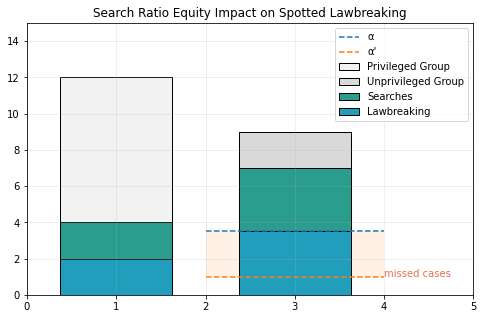

In [135]:
plt.figure(figsize=(8,5))
plt.xlim(0,5)
plt.ylim(0,15)
plt.grid(True, alpha = 0.25)

plt.bar(1,12, width = 1.25, label = 'Privileged Group', edgecolor = '#000000', color = '#f2f2f2')
plt.bar(1,4, width = 1.25,color = '#2A9D8F', edgecolor = '#000000')
plt.bar(1,2, width = 1.25,color = '#219ebc', edgecolor = '#000000')

plt.bar(3,9, width = 1.25,label = 'Unprivileged Group', edgecolor = '#000000', color = '#d9d9d9')
plt.bar(3,7, width = 1.25,label = 'Searches', facecolor = '#2A9D8F', edgecolor = '#000000')
plt.bar(3,3.5,width = 1.25, label = 'Lawbreaking', color = '#219ebc', edgecolor = '#000000')

x = np.linspace(2, 4, 300)
y1 = x*0 + 3.5
y2 = x*0 + 1

plt.plot(x, y1, '--', label = 'α')
plt.plot(x, y2, '--', label = "α'")

plt.legend()

plt.fill_between(x, 1, 3.5, alpha = 0.1)
plt.text(4, 1, "missed cases", color = '#e76f51')

plt.title('Search Ratio Equity Impact on Spotted Lawbreaking', fontsize = 12)